### Description

NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

The dataset used in this project is originally from NIDDK. 
#### The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.
 
### Dataset Description

The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.
 
Variables	Description
Pregnancies	Number of times pregnant
Glucose	Plasma glucose concentration in an oral glucose tolerance test
BloodPressure	Diastolic blood pressure (mm Hg)
SkinThickness	Triceps skinfold thickness (mm)
Insulin	Two hour serum insulin
BMI	Body Mass Index
DiabetesPedigreeFunction	Diabetes pedigree function
Age	Age in years
Outcome	Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

### Data Exploration:

Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

Glucose

BloodPressure

SkinThickness

Insulin

BMI

Visually explore these variables using histograms. Treat the missing values accordingly.

There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

 

### Data Exploration:

Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

Create scatter charts between the pair of variables to understand the relationships. Describe your findings.


### Data Modeling:

Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. 

Apply an appropriate classification algorithm to build a model.

Compare various models with the results from KNN algorithm.

Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc.

Please be descriptive to explain what values of these parameter you have used.

 

### Data Reporting:

Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

Pie chart to describe the diabetic or non-diabetic population

Scatter charts between relevant variables to analyze the relationships

Histogram or frequency charts to analyze the distribution of the data

Heatmap of correlation analysis among the relevant variables

Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

 

In [253]:
import pandas as pd
import numpy as np
df=pd.read_csv('health care diabetes.csv')
df.head()
# importing pandas and numpy library and reading the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [254]:
df.shape # checking the number of rows and columns

(768, 9)

In [255]:
df.info()  # checking the datatype, information about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [256]:
df.isnull()   # Checking for null values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [257]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [258]:
df.isnull().sum()   # getting the count of null  values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [259]:
df.describe()   # looking for the statistics information from the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [260]:
df.columns   # getting the column names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [261]:
df['Pregnancies'].value_counts()  # count from pregnanacy dataset

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [262]:
for i in df.columns:
    print('the count for ',i,'is: ',df[i].value_counts())
    print('***')
    
    ## getting columnwise count 

the count for  Pregnancies is:  1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
***
the count for  Glucose is:  99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64
***
the count for  BloodPressure is:  70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64
***
the count for  SkinThickness is:  0  

In [263]:
import matplotlib.pyplot as plt
# importing matplot library

(array([111., 135., 103.,  75.,  68.,  57.,   0.,  50.,  45.,  38.,  28.,
         24.,  11.,   0.,   9.,  10.,   2.,   1.,   0.,   1.]),
 array([ 0.  ,  0.85,  1.7 ,  2.55,  3.4 ,  4.25,  5.1 ,  5.95,  6.8 ,
         7.65,  8.5 ,  9.35, 10.2 , 11.05, 11.9 , 12.75, 13.6 , 14.45,
        15.3 , 16.15, 17.  ]),
 <BarContainer object of 20 artists>)

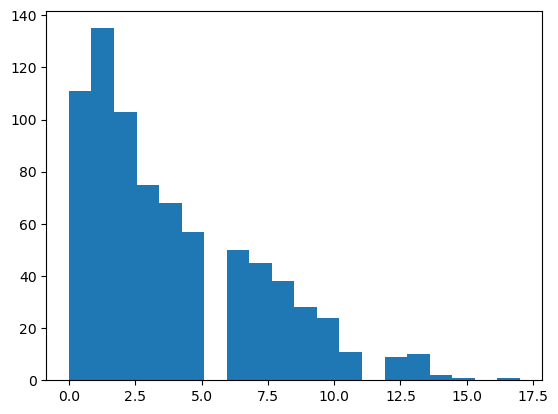

In [264]:
plt.hist(df['Pregnancies'], bins= 20)   # plotting histogram for the column Pregnancy with bin size  = 15

(array([  5.,   0.,   0.,   1.,   6.,  29.,  92., 145., 130., 119.,  77.,
         62.,  37.,  36.,  29.]),
 array([  0.        ,  13.26666667,  26.53333333,  39.8       ,
         53.06666667,  66.33333333,  79.6       ,  92.86666667,
        106.13333333, 119.4       , 132.66666667, 145.93333333,
        159.2       , 172.46666667, 185.73333333, 199.        ]),
 <BarContainer object of 15 artists>)

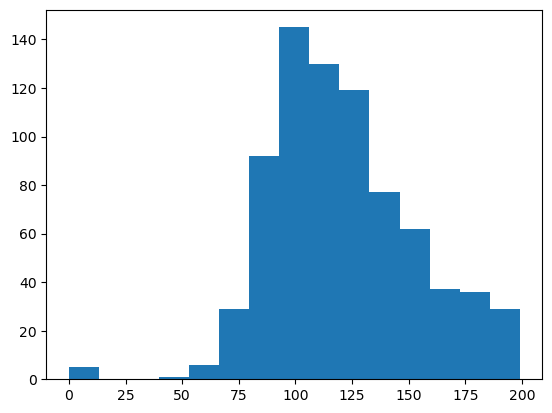

In [265]:
plt.hist(df['Glucose'],bins=15)  # plotting histogram for the column - Glucose 

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce2d0a0580>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce2d0a0ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce2d0a02e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce2d0a1000>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce2d0a12a0>],
 'means': []}

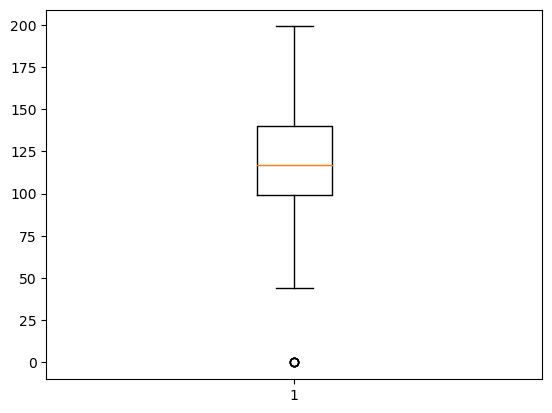

In [266]:
plt.boxplot(df['Glucose']) #plotting boxplot for column  - glucose

In [267]:
df['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [268]:
# we see  that we have outliers, we treat them by finding the mean
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [269]:
df['Glucose']==0  

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: Glucose, Length: 768, dtype: bool

In [270]:
df['Glucose'].mean() # getting the mean value  of glucose column

120.89453125

In [271]:
# check  for values with zero and trating them with mean
df['Glucose']=np.where(df['Glucose']==0,df['Glucose'].mean(),df['Glucose'])

(array([ 1.,  3.,  4., 15., 28., 59., 65., 84., 88., 78., 85., 40., 49.,
        39., 29., 25., 21., 23., 16., 16.]),
 array([ 44.  ,  51.75,  59.5 ,  67.25,  75.  ,  82.75,  90.5 ,  98.25,
        106.  , 113.75, 121.5 , 129.25, 137.  , 144.75, 152.5 , 160.25,
        168.  , 175.75, 183.5 , 191.25, 199.  ]),
 <BarContainer object of 20 artists>)

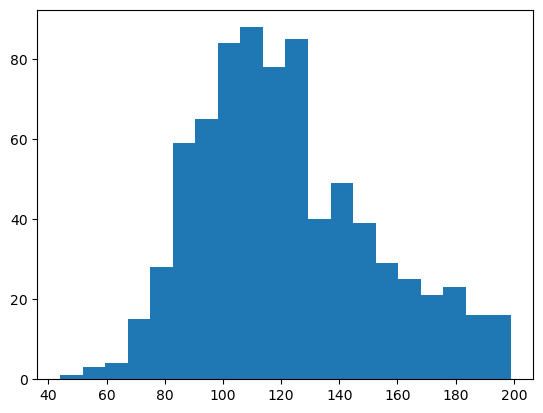

In [272]:
plt.hist(df['Glucose'], bins=20)

(array([ 35.,   1.,   2.,  13., 107., 261., 243.,  87.,  14.,   5.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

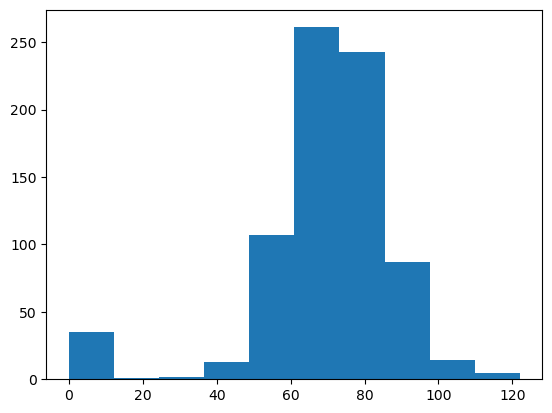

In [273]:
# Similarly continuing for the other columns - 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 
#'DiabetesPedigreeFunction'      

plt.hist(df['BloodPressure'])

In [274]:
df['BloodPressure'].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce2cf3e950>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce2cfe8cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce2cf95f60>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce2cfe9210>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce2cfe94b0>],
 'means': []}

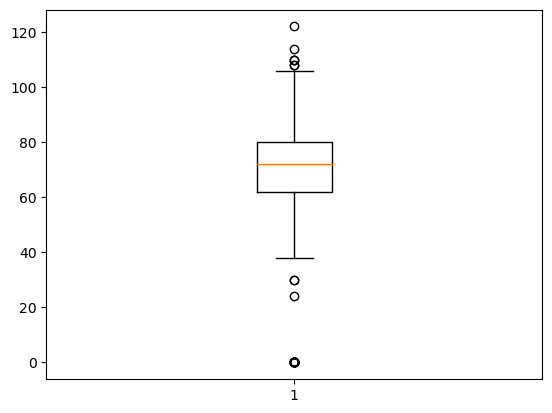

In [275]:
plt.boxplot(df['BloodPressure'])

In [276]:
df['BloodPressure']=np.where(df['BloodPressure']==0, df['BloodPressure'].median(),df['BloodPressure'])

(array([  3.,   2.,  35., 118., 261., 214., 105.,  18.,  10.,   2.]),
 array([ 24. ,  33.8,  43.6,  53.4,  63.2,  73. ,  82.8,  92.6, 102.4,
        112.2, 122. ]),
 <BarContainer object of 10 artists>)

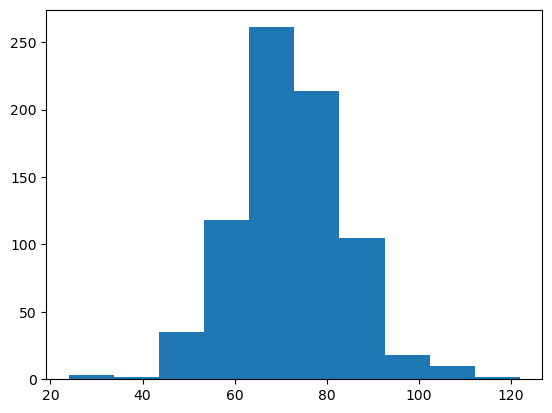

In [277]:
plt.hist(df['BloodPressure'])

(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

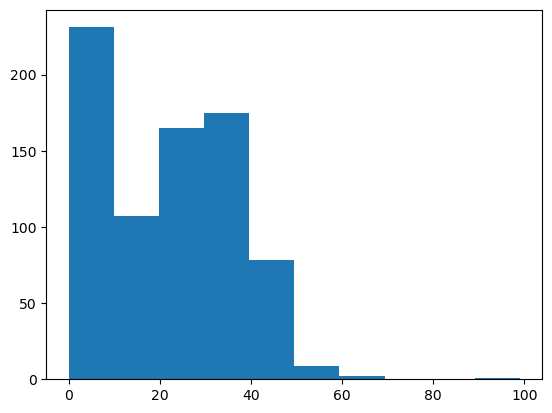

In [278]:
plt.hist(df['SkinThickness'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce2e8d1840>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce2e8d1d80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce2e8d15a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce2e8d22c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce2e8d2560>],
 'means': []}

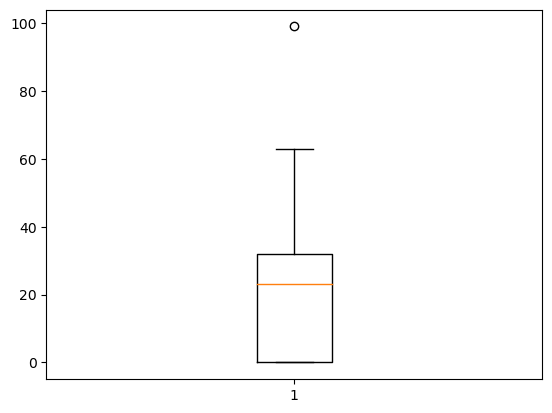

In [279]:
plt.boxplot(df['SkinThickness'])

(array([487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <BarContainer object of 10 artists>)

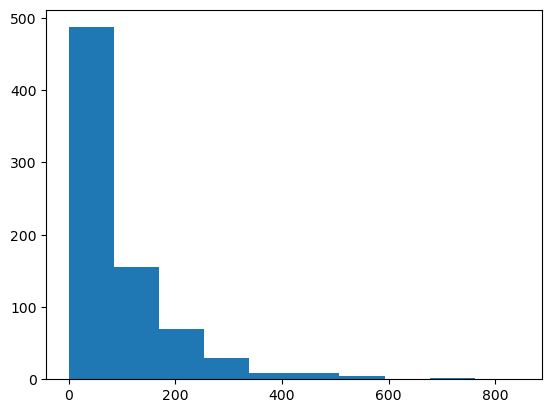

In [280]:
plt.hist(df['Insulin'])

In [281]:
df['Insulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce2e9b2410>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce2e9b2950>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce2e9b2170>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce2e9b2e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce2e9b3130>],
 'means': []}

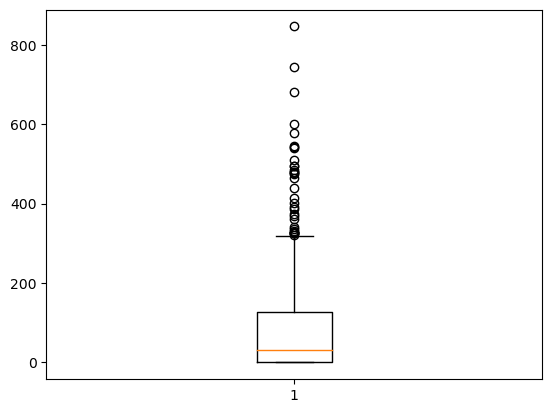

In [282]:
plt.boxplot(df['Insulin'])

In [283]:
df['Insulin'].value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [284]:
df['Insulin']=np.where(df['Insulin']==0, df['Insulin'].median(),df['Insulin'])

(array([516., 143.,  55.,  29.,   7.,  10.,   4.,   1.,   2.,   1.]),
 array([ 14. ,  97.2, 180.4, 263.6, 346.8, 430. , 513.2, 596.4, 679.6,
        762.8, 846. ]),
 <BarContainer object of 10 artists>)

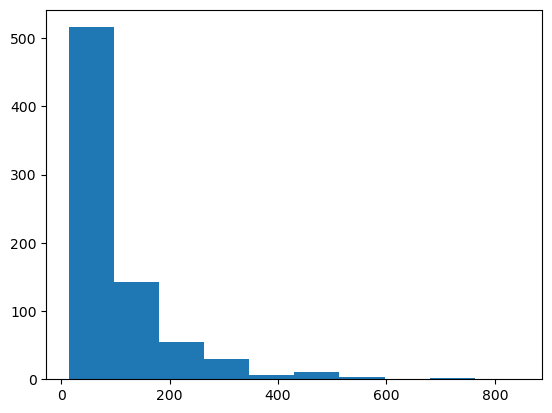

In [285]:
plt.hist(df['Insulin'])

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

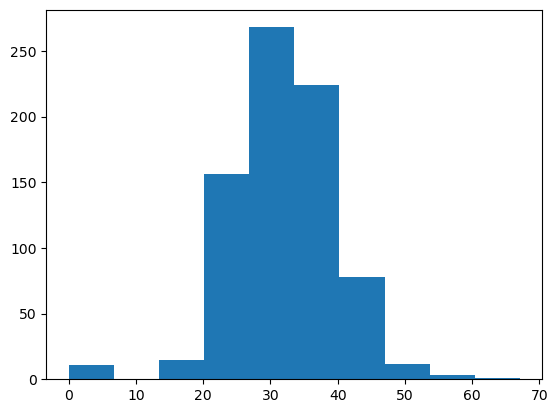

In [286]:
plt.hist(df['BMI'])

In [287]:
df['BMI'].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1ce2eb2b130>,
 'caps': [<matplotlib.lines.Line2D at 0x1ce2eb2b670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ce2eb2ae90>],
 'medians': [<matplotlib.lines.Line2D at 0x1ce2eb2bb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ce2eb2bdc0>],
 'means': []}

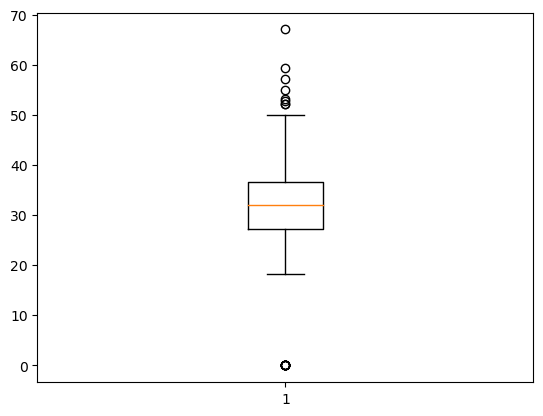

In [288]:
plt.boxplot(df['BMI'])

In [289]:
df['BMI']=np.where(df['BMI']==0, df['BMI'].median(), df['BMI'])

(array([ 52., 161., 207., 193.,  91.,  48.,  10.,   4.,   1.,   1.]),
 array([18.2 , 23.09, 27.98, 32.87, 37.76, 42.65, 47.54, 52.43, 57.32,
        62.21, 67.1 ]),
 <BarContainer object of 10 artists>)

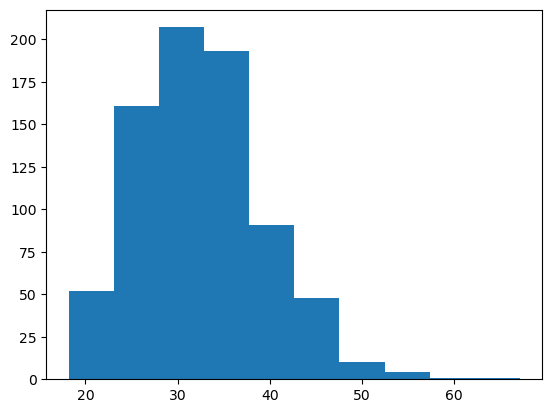

In [290]:
plt.hist(df['BMI'])

(array([318., 206., 136.,  58.,  25.,  15.,   3.,   3.,   1.,   3.]),
 array([0.078 , 0.3122, 0.5464, 0.7806, 1.0148, 1.249 , 1.4832, 1.7174,
        1.9516, 2.1858, 2.42  ]),
 <BarContainer object of 10 artists>)

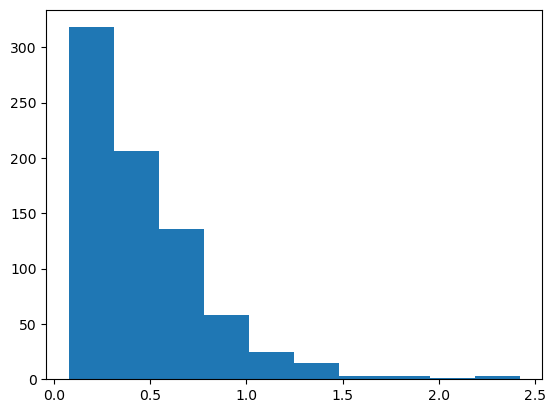

In [291]:
plt.hist(df['DiabetesPedigreeFunction'])

In [292]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness                 int64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [293]:
# copying the data frame to df1 and plotting the columns based on the data type
df1=pd.DataFrame(df.dtypes,columns=['data_type'])

In [294]:
df1

,data_type
Pregnancies,int64
Glucose,float64
BloodPressure,float64
SkinThickness,int64
Insulin,float64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [295]:
# importing sea born library
import seaborn as sns

<Axes: xlabel='data_type', ylabel='count'>

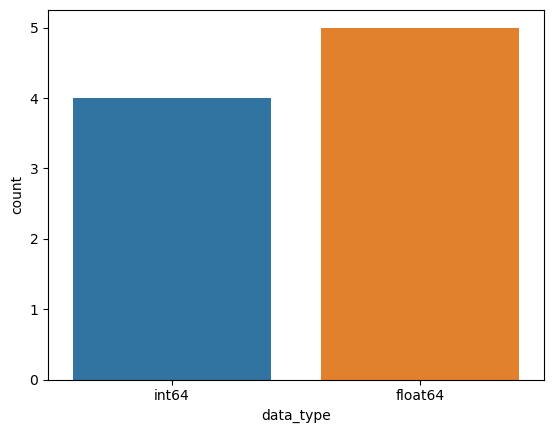

In [296]:
# plotting count plot for the datatype - integer and float
sns.countplot(data=df1,x='data_type')

In [297]:
# checking for the number of patients with diabetes based on outcome column
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [298]:
# transferring data to df_pos, for those outcome =1
df_pos=df[df['Outcome']==1]

(array([11., 23., 48., 63., 41., 29., 24., 15.,  5.,  4.,  3.,  0.,  1.,
         0.,  1.]),
 array([22.9       , 25.84666667, 28.79333333, 31.74      , 34.68666667,
        37.63333333, 40.58      , 43.52666667, 46.47333333, 49.42      ,
        52.36666667, 55.31333333, 58.26      , 61.20666667, 64.15333333,
        67.1       ]),
 [<matplotlib.patches.Polygon at 0x1ce2fcda3e0>])

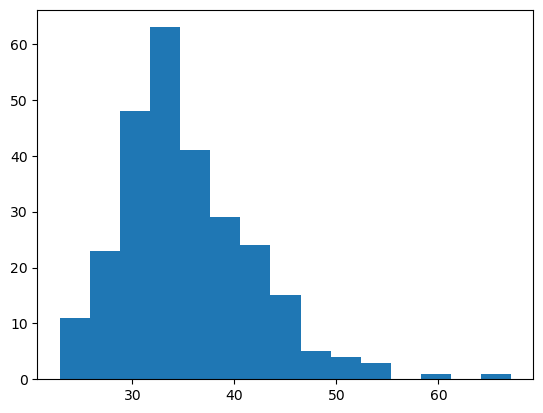

In [299]:
#plotting histogram graph for column  - BMI - for patients with diabetes  
plt.hist(df_pos['BMI'], bins=15,histtype='stepfilled')

(array([ 3.,  4.,  5., 11., 14., 16., 18., 23., 20., 17., 15., 17., 14.,
        15., 15., 14., 12., 12., 10., 13.]),
 array([ 78.  ,  84.05,  90.1 ,  96.15, 102.2 , 108.25, 114.3 , 120.35,
        126.4 , 132.45, 138.5 , 144.55, 150.6 , 156.65, 162.7 , 168.75,
        174.8 , 180.85, 186.9 , 192.95, 199.  ]),
 <BarContainer object of 20 artists>)

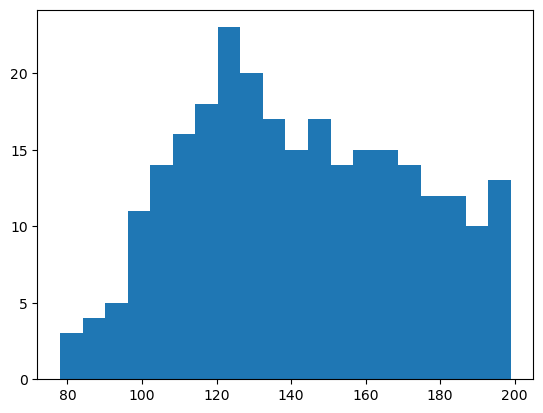

In [300]:
#plotting histogram graph for column  - Glucose - for patients with diabetes
plt.hist(df_pos['Glucose'],bins=20)

(array([ 1.,  0.,  1.,  0.,  6.,  5.,  3., 17., 25., 35., 68., 30., 25.,
        23., 14.,  4.,  3.,  3.,  2.,  3.]),
 array([ 30. ,  34.2,  38.4,  42.6,  46.8,  51. ,  55.2,  59.4,  63.6,
         67.8,  72. ,  76.2,  80.4,  84.6,  88.8,  93. ,  97.2, 101.4,
        105.6, 109.8, 114. ]),
 <BarContainer object of 20 artists>)

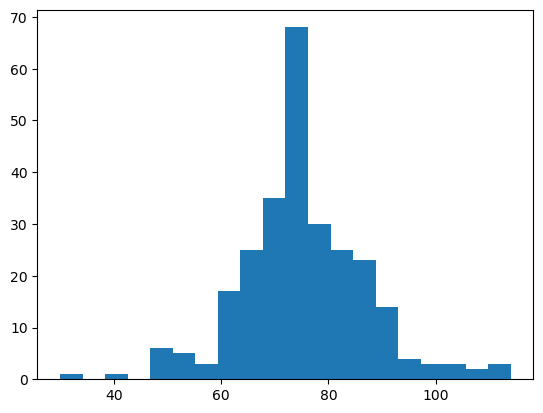

In [301]:
#plotting histogram graph for column  - Bloodpressure - for patients with diabetes
plt.hist(df_pos['BloodPressure'], bins=20)

(array([88.,  3., 12., 29., 48., 46., 31.,  8.,  1.,  1.,  0.,  0.,  0.,
         0.,  1.]),
 array([ 0. ,  6.6, 13.2, 19.8, 26.4, 33. , 39.6, 46.2, 52.8, 59.4, 66. ,
        72.6, 79.2, 85.8, 92.4, 99. ]),
 <BarContainer object of 15 artists>)

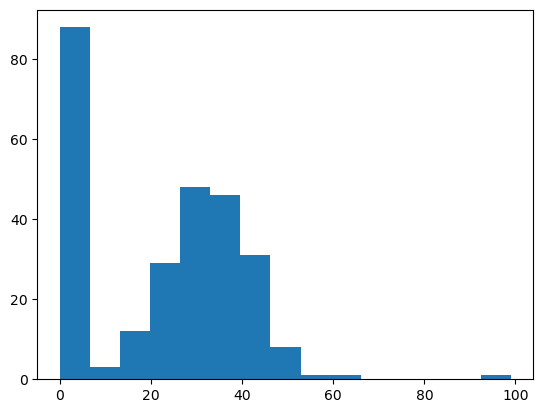

In [302]:
#plotting histogram graph for column  - Skin Thickness - for patients with diabetes
plt.hist(df_pos['SkinThickness'], bins=15)

(array([144.,  23.,  45.,  22.,  11.,   8.,   3.,   0.,   7.,   2.,   2.,
          0.,   0.,   0.,   1.]),
 array([ 14.        ,  69.46666667, 124.93333333, 180.4       ,
        235.86666667, 291.33333333, 346.8       , 402.26666667,
        457.73333333, 513.2       , 568.66666667, 624.13333333,
        679.6       , 735.06666667, 790.53333333, 846.        ]),
 <BarContainer object of 15 artists>)

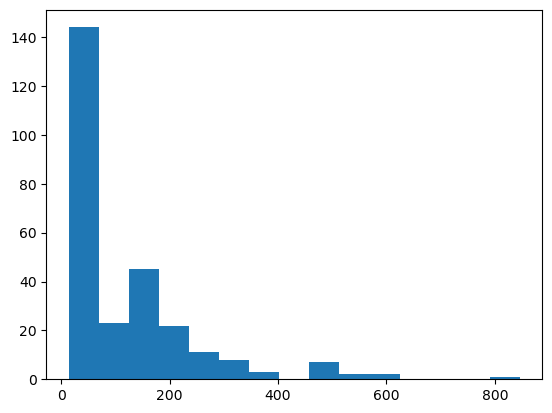

In [303]:
#plotting histogram graph for column  - Insulin- for patients with diabetes
plt.hist(df_pos['Insulin'],bins=15)

<Axes: xlabel='BloodPressure', ylabel='Glucose'>

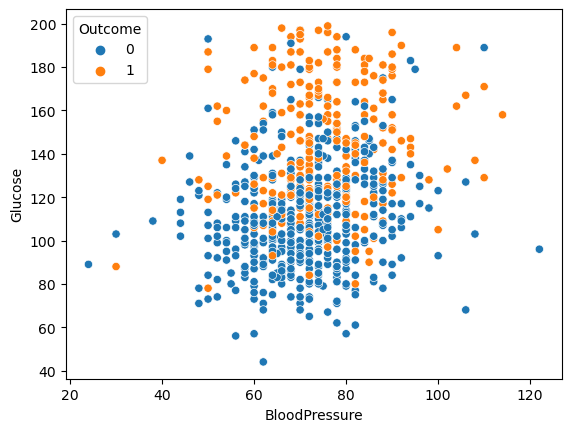

In [304]:
# plotting scatter plot for column - blood pressure and glucose and checking for outcome in df dataframe
sns.scatterplot(x=df['BloodPressure'], y=df['Glucose'], hue=df['Outcome'])

<Axes: xlabel='BMI', ylabel='Insulin'>

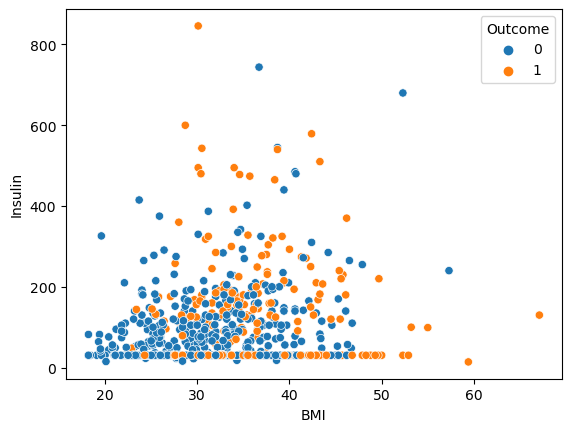

In [305]:
# plotting scatter plot for column - bmi and insulin and checking for outcome in df dataframe
sns.scatterplot(data=df,x='BMI',y='Insulin',hue='Outcome')

<Axes: xlabel='SkinThickness', ylabel='Insulin'>

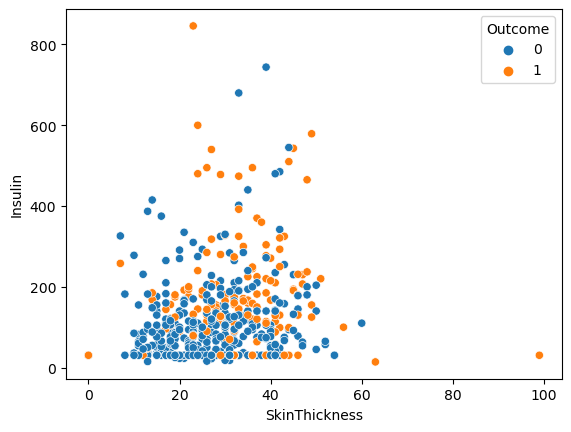

In [306]:
# plotting scatter plot for column - skinThickness and insulin and checking for outcome in df dataframe
sns.scatterplot(data=df,x='SkinThickness',y='Insulin',hue='Outcome')

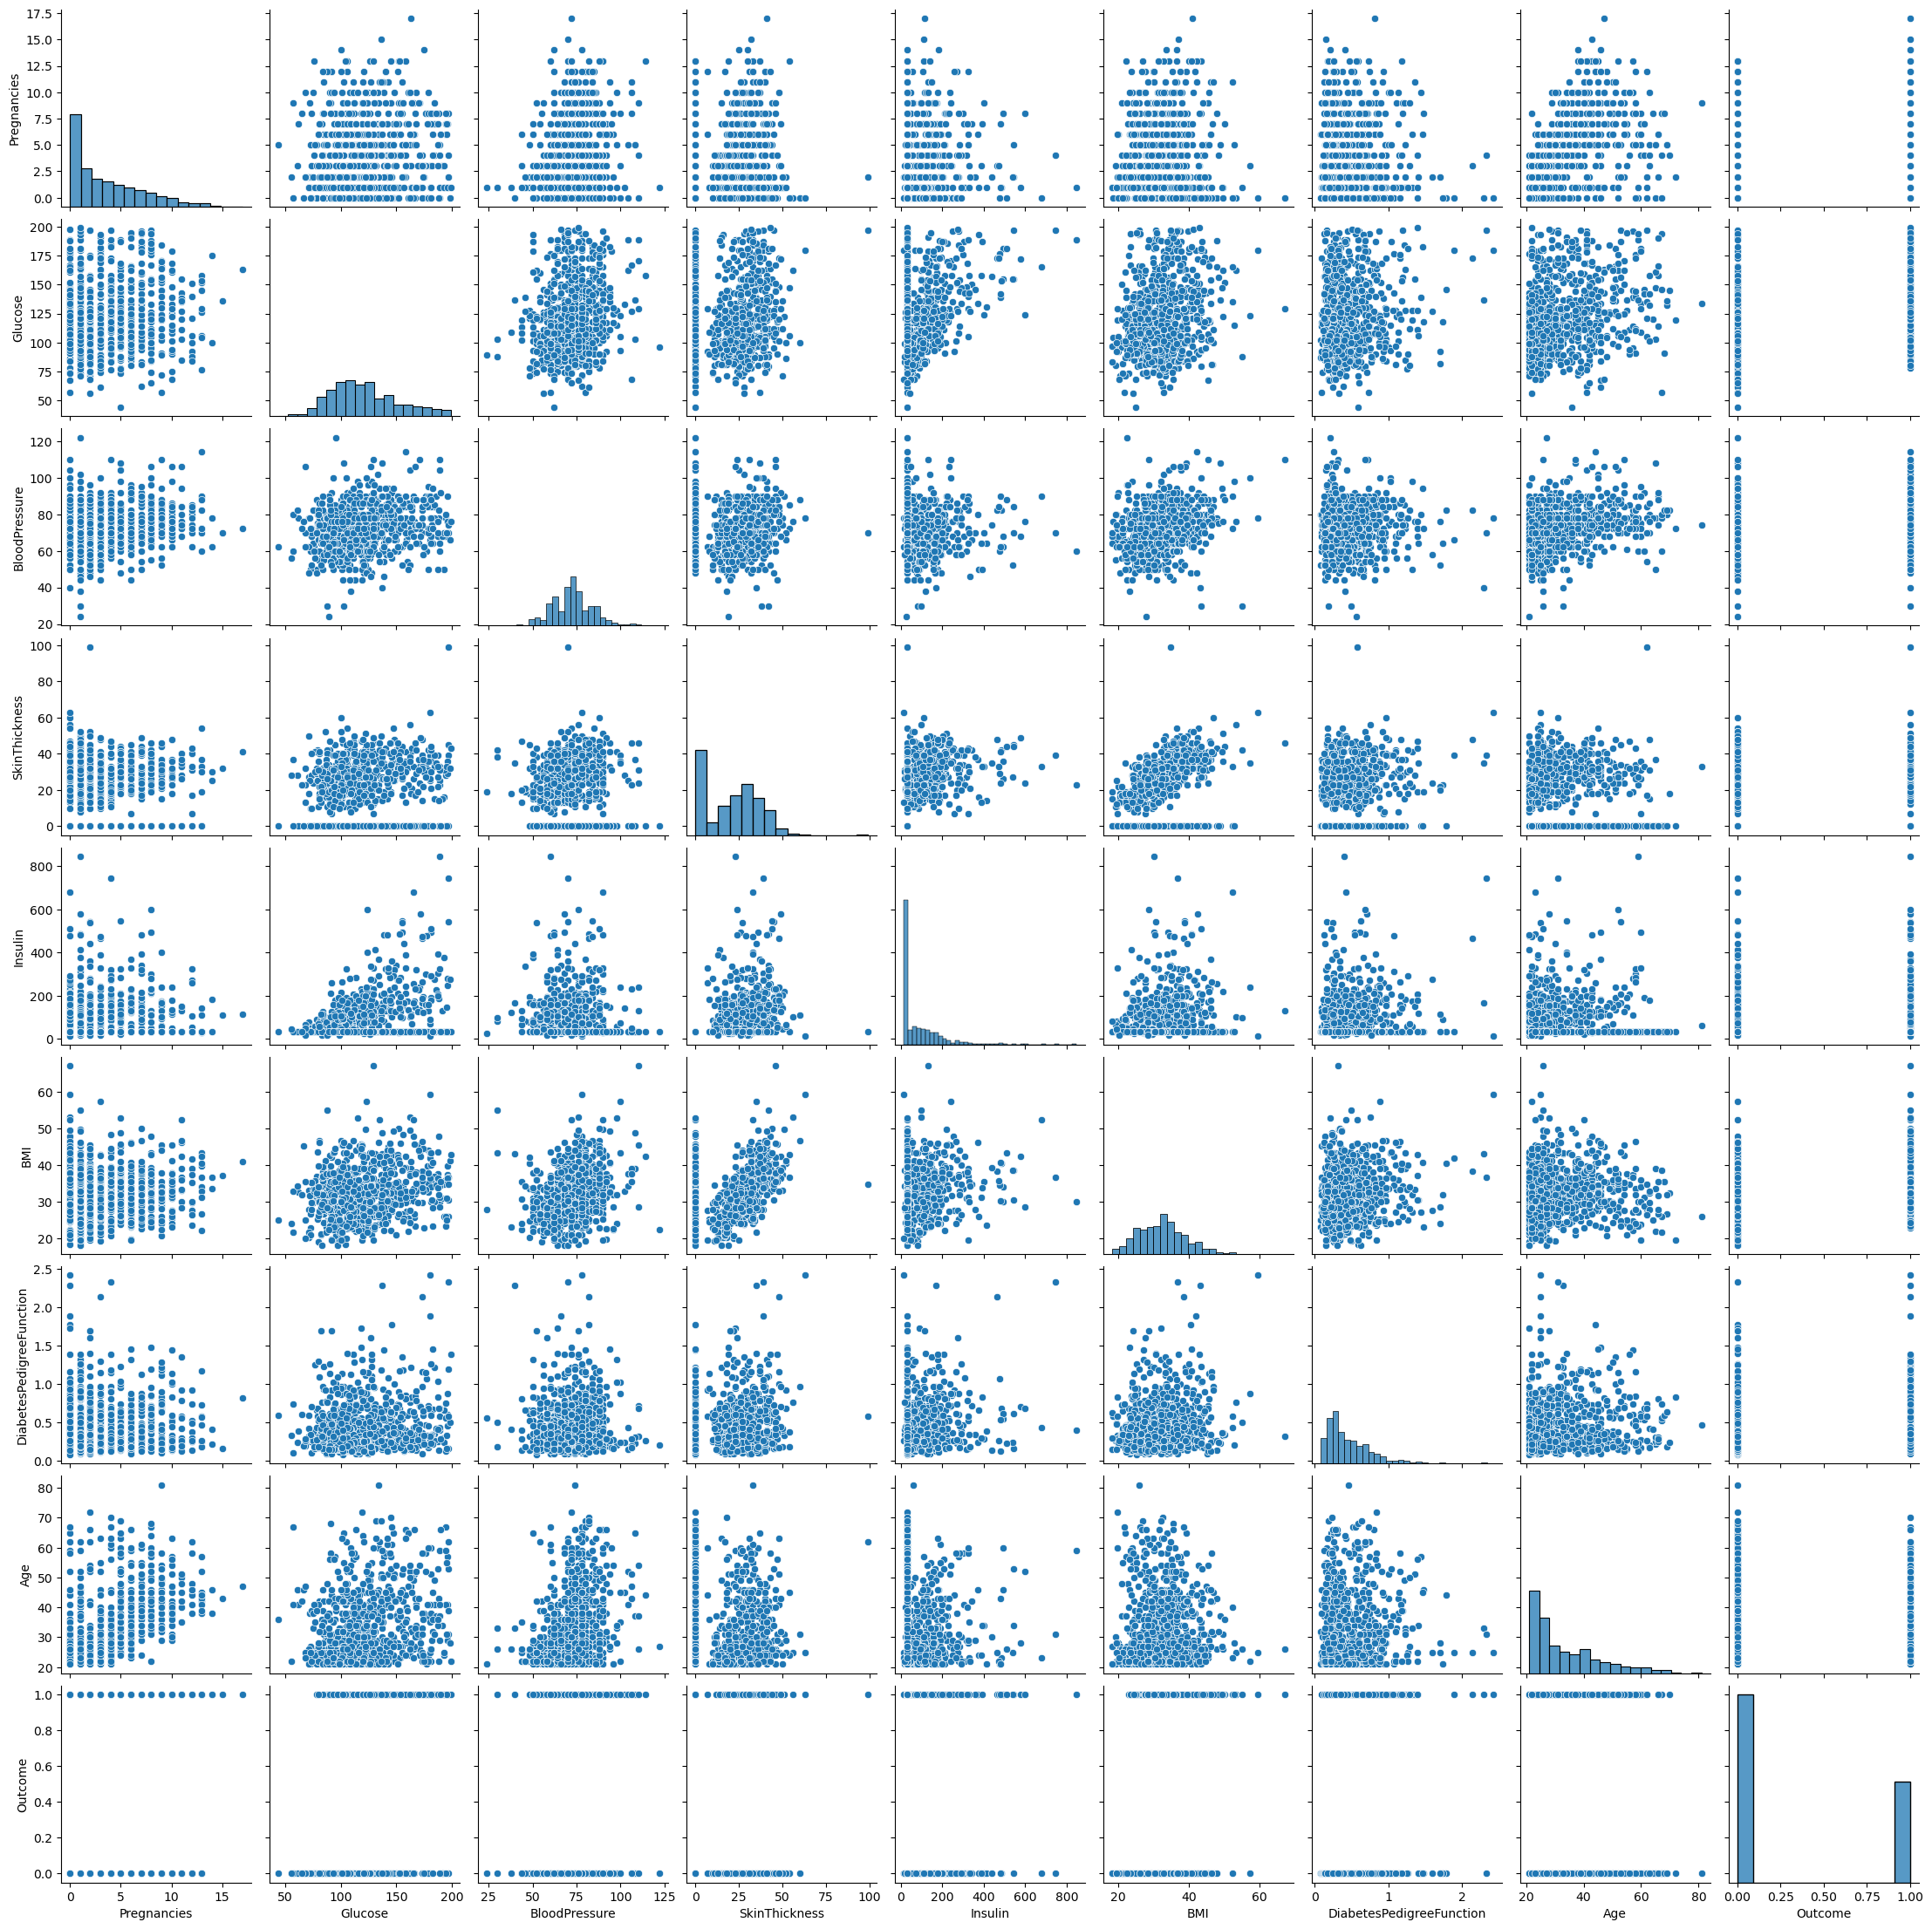

In [307]:
# displaying pairplot
sns.pairplot(data=df)

In [308]:
# correlation
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208615,-0.081672,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.218623,0.074934,0.357081,0.231469,0.137106,0.266600,0.492908
BloodPressure,0.208615,0.218623,1.000000,0.007937,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,-0.081672,0.074934,0.007937,1.000000,0.397161,0.381740,0.183928,-0.113970,0.074752
Insulin,-0.055697,0.357081,-0.028721,0.397161,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231469,0.281132,0.381740,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137106,-0.002378,0.183928,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.324915,-0.113970,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.165723,0.074752,0.148457,0.312249,0.173844,0.238356,1.000000


<Axes: >

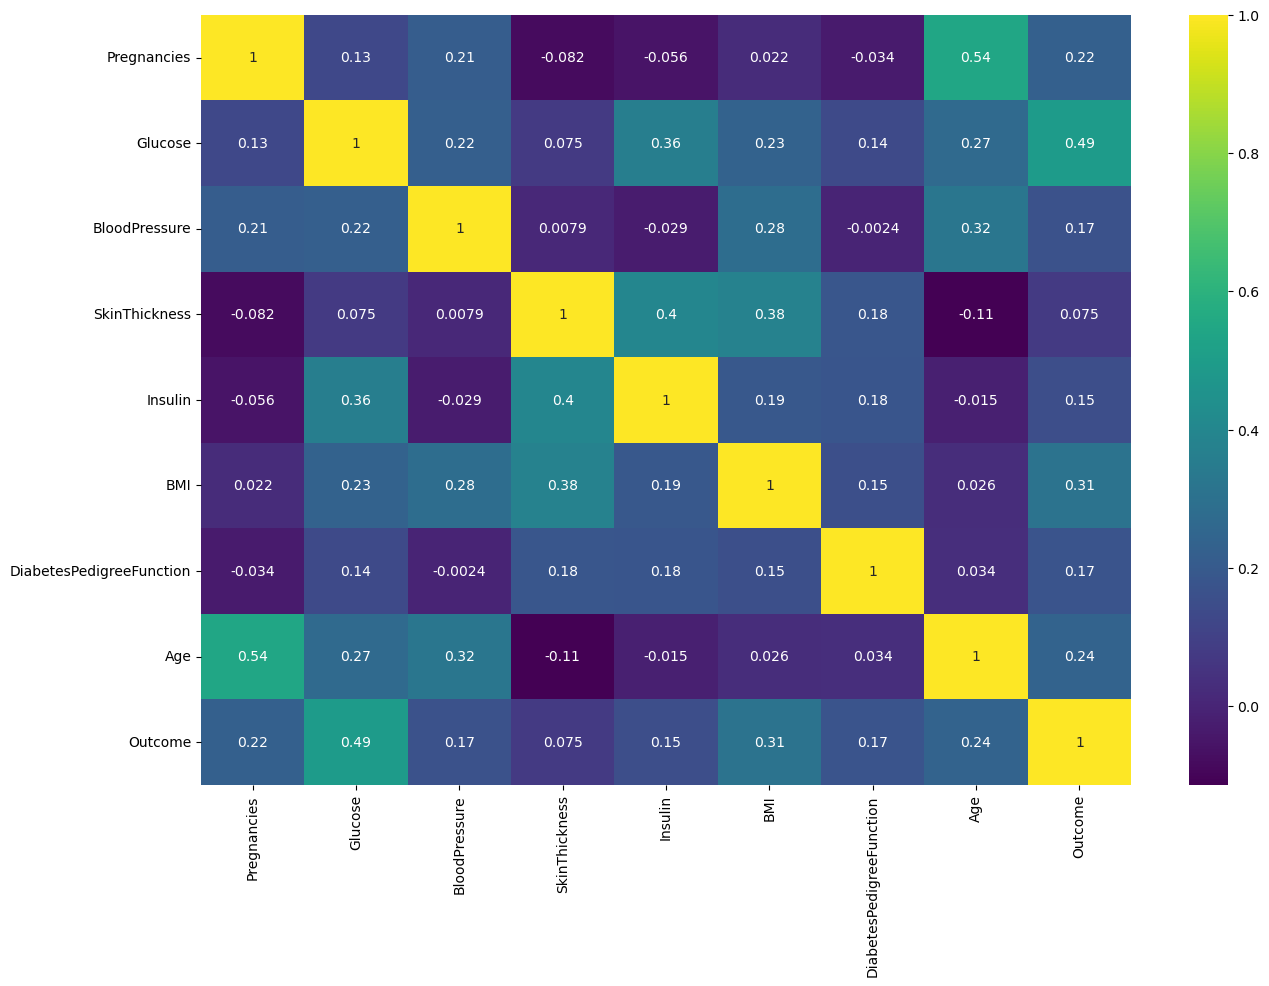

In [309]:
# plotting heatmap on colleration
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [310]:
# getting the count of outcome column
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### data prep - to train the model on training data
 #### find the accuracy of prediction of the trained model on the test data

 #### 70 % of the data as training data and 30 % as the test data


In [311]:
from sklearn.model_selection import train_test_split
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [317]:
x=df.drop('Outcome', axis=1)
# we copy all columns dropping column Outcome

In [315]:
x.head(2)
# we see the column outcome has been removed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,30.5,33.6,0.627,50
1,1,85.0,66.0,29,30.5,26.6,0.351,31


In [318]:
y=df['Outcome']
# column Outcome copied to Y

In [94]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [319]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [330]:
np.random.randint(100)  
# python throws a random integer within 100, everytime we execute , the number keeps changing, so we use seed 0 to fix the 
# number

47

In [331]:
# to fix the random number we use random.seed(0)
np.random.seed(0)
np.random.randint(100)

44

In [332]:
x_train.shape

(537, 8)

In [333]:
x_test.shape

(231, 8)

In [334]:
y_train.shape

(537,)

In [335]:
y_test.shape

(231,)

### Logistic Regression

Logistic regression is a machine learning algorithm used to predict the probability that an observation belongs to one of two possible classes.

In [338]:
# import the required library

from sklearn.linear_model import LogisticRegression

In [337]:
# Build the model
log_regression=LogisticRegression(max_iter=200)

In [111]:
#fit the model
log_model=log_regression.fit(x_train,y_train)

In [339]:
# predict the model
y_predict=log_model.predict(x_test)

In [340]:
# import the library and calculate the accuracy score
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_predict)

In [118]:
accuracy

0.7662337662337663

In [119]:
# import the confusion matrix and classification report

from sklearn.metrics import confusion_matrix, classification_report

In [120]:
confusion_matrix(y_test,y_predict)

array([[140,  17],
       [ 37,  37]], dtype=int64)

In [121]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       157
           1       0.69      0.50      0.58        74

    accuracy                           0.77       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.76      0.77      0.75       231



### KNN

K-nearest neighbors (KNN) is a type of supervised learning algorithm used for both regression and classification. 
KNN tries to predict the correct class for the test data by calculating the distance
between the test data and all the training points. 
Then select the K number of points which is closet to the test data. 
The KNN algorithm calculates the probability of the test data belonging to the classes of ‘K’ training data 
and class holds the highest probability will be selected. 
In the case of regression, the value is the mean of the ‘K’ selected training points.

In [343]:
# Importing the library and building the model

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn_model=knn.fit(x_train, y_train)
k_predict=knn_model.predict(x_test)

In [344]:
accuracy=accuracy_score(y_test, k_predict)

In [345]:
accuracy

0.7272727272727273

In [346]:
# getting the accuracy score and classification report
print (classification_report(y_test, k_predict))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       157
           1       0.58      0.51      0.55        74

    accuracy                           0.73       231
   macro avg       0.68      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231



### Decision  Tree 

A decision tree is a non-parametric supervised learning algorithm. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

In [347]:
# Importing the library and building the model 

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree_model=dtree.fit(x_train, y_train)
dtree_predict=dtree_model.predict(x_test)

In [150]:
print(classification_report(y_test, dtree_predict))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       157
           1       0.53      0.45      0.49        74

    accuracy                           0.70       231
   macro avg       0.64      0.63      0.64       231
weighted avg       0.69      0.70      0.69       231



### Random Forest

Random forests is a powerful machine learning model based on an ensemble of decision trees,
where each tree is grown using a random subset of the data set. 
The final prediction of the model is based on a majority voting (for classification) or averaging (for regression) of the predictions of the trees in the forest.

In [348]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier()
rf_model=random_forest.fit(x_train,y_train)
rf_predict=rf_model.predict(x_test)

In [349]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       157
           1       0.68      0.49      0.57        74

    accuracy                           0.76       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.75      0.76      0.75       231

